# Association_Rules_Movies

### Prepare rules for the all the data sets 
    1) Try different values of support and confidence. Observe the change in number of rules for different support, 
    confidence values.
    2) Change the minimum length in apriori algorithm
    3) Visulize the obtained rules using different plots 


#### Data Description:

Different movies in a Movie shop.
    
    Features:
    1.) Sixth Sense 2.) Gladiator 3.) LOTR1 4.) Harry Potter1 5.) Patriot 6.) LOTR2 7.) Harry Potter2 8.) LOTR 
    9.) Braveheart 10.) Green Mile

### Project Background

Finding association rules for different movies in a Movie shop.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import warnings as warnings
warnings.filterwarnings("ignore")

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# books data
movies_data = pd.read_csv("my_movies.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
movies_data.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies_data = movies_data.iloc[:,5:]
movies_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
# Shape of the data
movies_data.shape

(10, 10)

In [6]:
# Summary of the data
movies_data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Check the data types
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [8]:
# most popular items
count = movies_data.sum().sort_values(ascending=False).rename_axis('Movies').reset_index(name='Sold_Counts')
count

,Movies,Sold_Counts
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


In [9]:
for i in movies_data.columns:
    print(i)
    print(movies_data[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



### Step-2.2 : Handling missing values

In [10]:
# Check for Null values
movies_data.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

#### There are no missing values.

### Step-2.3 : Exploring data using Visualisation

#### Pie chart

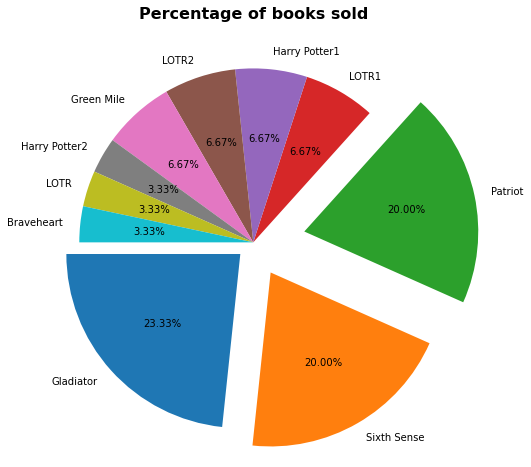

In [11]:
plt.figure(figsize=(8,8))
plt.pie(count['Sold_Counts'],labels=count['Movies'],autopct='%.2f%%',explode = (0.1,0.2,0.3,0,0,0,0,0,0,0),startangle=180)
plt.title("Percentage of books sold",fontsize=16,fontweight='bold')
plt.show()

#### Observation
+ We can clearly see that the Gladiator, Sixth sense & Patriot are the highest amount of books sold. So we can assume that these categories may have some association rule.

#### Bar chart

Text(0.5, 1.0, 'No. of Movies sold in each Category of Movies')

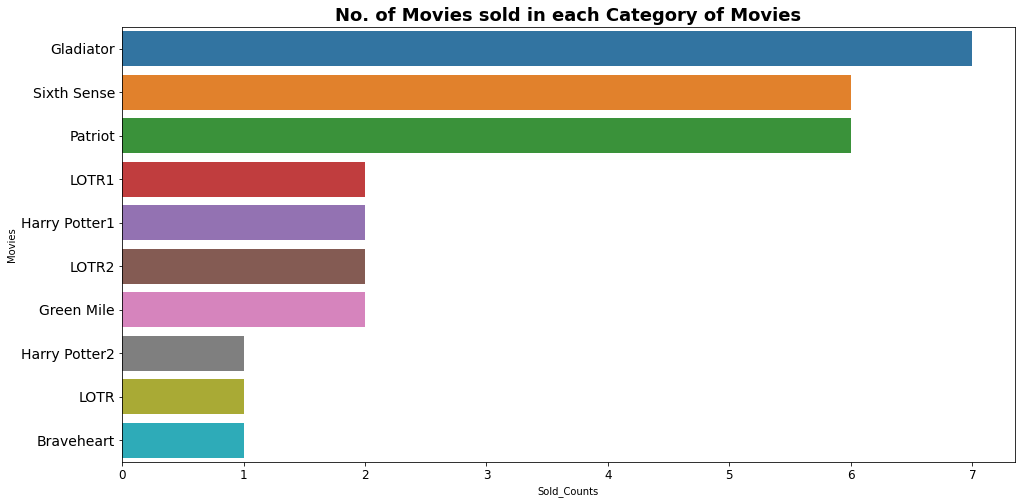

In [12]:
plt.figure(figsize = (16,8))
sb.barplot(x = 'Sold_Counts', y = 'Movies', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('No. of Movies sold in each Category of Movies',  fontsize = 18, fontweight = 'bold')

### Step-3 : Creating Association rules Using Apriori Algorithm

### Step-3.1 : Considering 10% Support and 30% Confidence

In [13]:
item_sets1 = apriori(movies_data, min_support=0.1, use_colnames=True)
item_sets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [14]:
rules_conf1 = association_rules(item_sets1, metric="confidence", min_threshold=0.3)
rules_conf1 = rules_conf1.sort_values('confidence',ascending=False)
rules_conf1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
179,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
168,"(LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
94,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
95,"(LOTR1, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
99,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
73,(LOTR2),"(Green Mile, Sixth Sense)",0.2,0.2,0.1,0.500000,2.500000,0.06,1.6
72,(Green Mile),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
70,"(Green Mile, Sixth Sense)",(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.6
216,(LOTR1),"(Green Mile, LOTR2, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [15]:
rules_lift1 = rules_conf1[rules_conf1['lift']>1]
rules_lift1 = rules_lift1.sort_values('lift',ascending=False)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
179,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
119,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
153,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
129,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
37,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
32,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


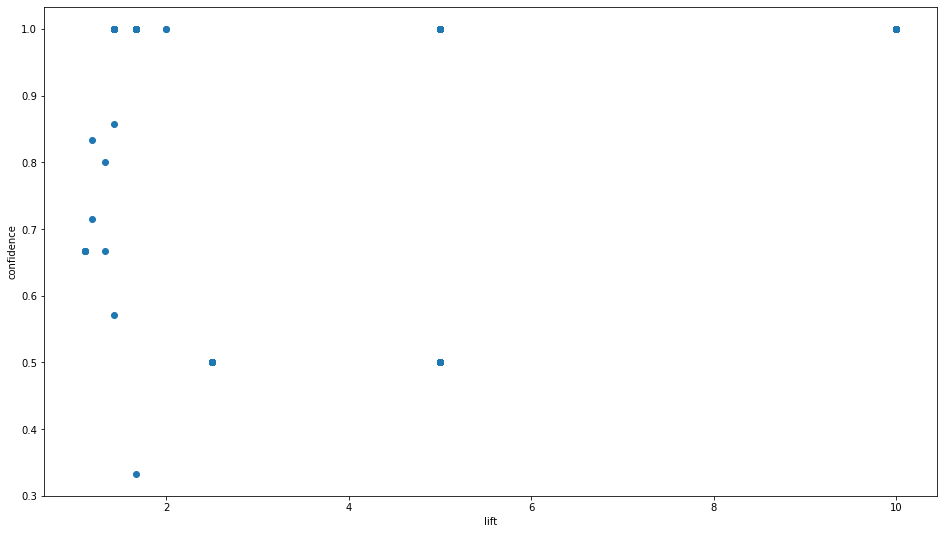

In [16]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift1['lift'],rules_lift1['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-3.2 : Considering 15% Support and 40% Confidence

In [17]:
item_sets2 = apriori(movies_data, min_support=0.15, use_colnames=True)
item_sets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [18]:
rules_conf2 = association_rules(item_sets2, metric="confidence", min_threshold=0.4)
rules_conf2 = rules_conf2.sort_values('confidence',ascending=False)
rules_conf2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [19]:
rules_lift2 = rules_conf2[rules_conf2['lift']>1]
rules_lift2 = rules_lift2.sort_values('lift',ascending=False)
rules_lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
12,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


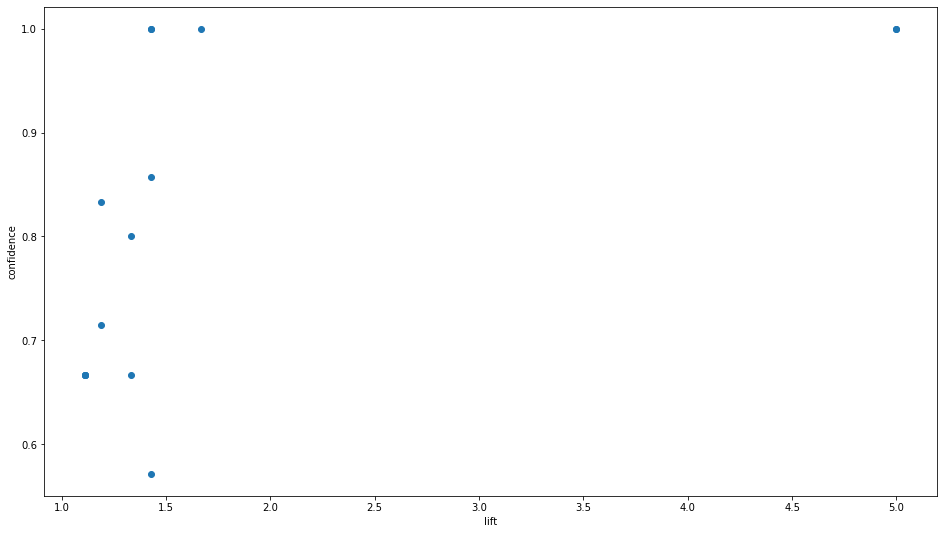

In [20]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift2['lift'],rules_lift2['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-3.3 : Considering 20% Support and 60% Confidence

In [21]:
item_sets3 = apriori(movies_data, min_support=0.2, use_colnames=True)
item_sets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [22]:
rules_conf3 = association_rules(item_sets3, metric="confidence", min_threshold=0.6)
rules_conf3 = rules_conf3.sort_values('confidence',ascending=False)
rules_conf3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [23]:
rules_lift3 = rules_conf3[rules_conf3['lift']>1]
rules_lift3 = rules_lift3.sort_values('lift',ascending=False)
rules_lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
12,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


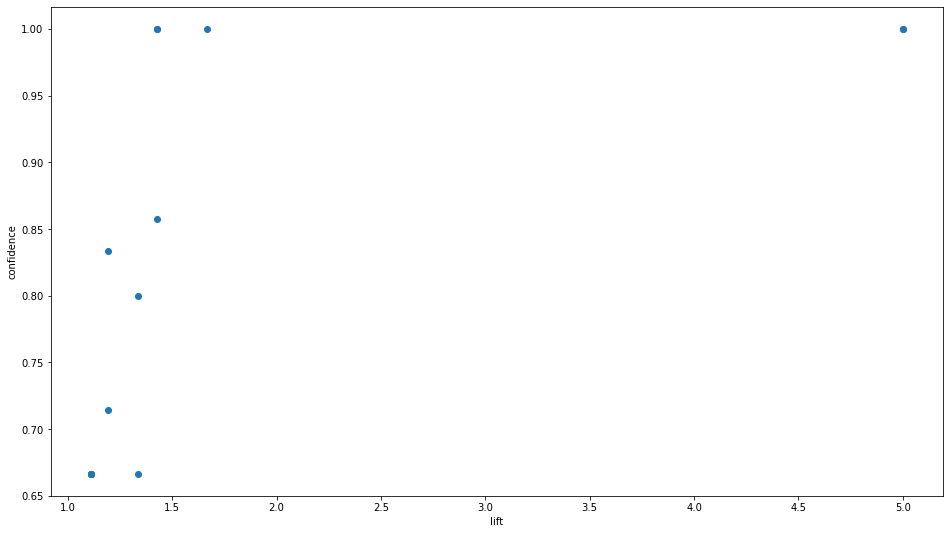

In [24]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift3['lift'],rules_lift3['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-4 : Conclusion

In [25]:
print("For 10% Support and 30% Confidence, No. of Association Rules = ",rules_lift1.shape[0])
print("For 15% Support and 40% Confidence, No. of Association Rules = ",rules_lift2.shape[0])
print("For 20% Support and 60% Confidence, No. of Association Rules = ",rules_lift3.shape[0])

For 10% Support and 30% Confidence, No. of Association Rules =  210
For 15% Support and 40% Confidence, No. of Association Rules =  15
For 20% Support and 60% Confidence, No. of Association Rules =  14


#### For 20% Support and 60% Confidence, the top association rule obtained is Antecedent = LOTR1, Consequent = LOTR2